# Stemming
Stemming is definitely the simpler of the two approaches. With stemming, words are reduced to their word stems

## Porter Stemmer

One of the most common - and effective - stemming tools is [*Porter's Algorithm*](https://tartarus.org/martin/PorterStemmer/) developed by Martin Porter in [1980](https://tartarus.org/martin/PorterStemmer/def.txt). The algorithm employs five phases of word reduction, each with its own set of mapping rules. Its main concern is removing the common endings to words so that they can be resolved to a common form. In the first phase, simple suffix mapping rules are defined, such as:

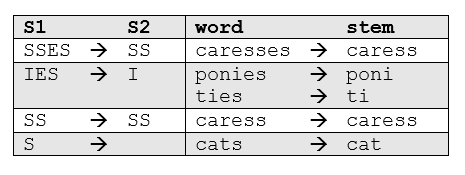

From a given set of stemming rules only one rule is applied, based on the longest suffix S1. Thus, `caresses` reduces to `caress` but not `cares`.

More sophisticated phases consider the length/complexity of the word before applying a rule. For example:

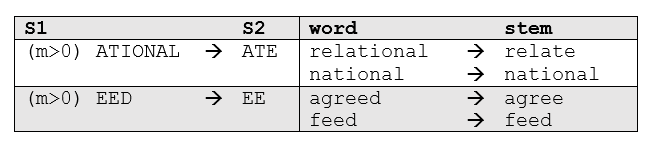

Here `m>0` describes the "measure" of the stem, such that the rule is applied to all but the most basic stems.

In [1]:
# Import the toolkit and the full Porter Stemmer library
import nltk

from nltk.stem.porter import *

In [2]:
p_stemmer = PorterStemmer()

In [3]:
words = ['run','runner','running','ran','runs','easily','fairly']

In [4]:
for word in words:
    print(word+' --> '+p_stemmer.stem(word))

run --> run
runner --> runner
running --> run
ran --> ran
runs --> run
easily --> easili
fairly --> fairli


<font color=red>Note how the stemmer recognizes "runner" as a noun, not a verb form or participle. Also, the adverbs "easily" and "fairly" are stemmed to the unusual root "easili" and "fairli"</font>
___

## Snowball Stemmer
This is somewhat of a misnomer, as Snowball is the name of a stemming language developed by Martin Porter. The algorithm used here is more acurately called the "English Stemmer" or "Porter2 Stemmer". It offers a slight improvement over the original Porter stemmer, both in logic and speed. Since **nltk** uses the name SnowballStemmer, we'll use it here.

In [5]:
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

In [6]:
words = ['run','runner','running','ran','runs','easily','fairly']
# words = ['generous','generation','generously','generate']

In [7]:
for word in words:
    print(word+' --> '+s_stemmer.stem(word))

run --> run
runner --> runner
running --> run
ran --> ran
runs --> run
easily --> easili
fairly --> fair


<font color=red>In this case the stemmer performed the same as the Porter Stemmer, with the exception that it handled the stem of "fairly" more appropriately with "fair"</font>
___

In [22]:
words = ['consolingly']

In [23]:
print('Porter Stemmer:')
for word in words:
    print(word+' --> '+p_stemmer.stem(word)) # Porter Stemmer

Porter Stemmer:
consolingly --> consolingli


In [24]:
print('Snowball Stemmer:')
for word in words:
    print(word+' --> '+s_stemmer.stem(word)) # Snowball Stemmer

Snowball Stemmer:
consolingly --> consol


___

In [30]:
words2 = ['Shan Jiang','university', 'universities', 'universal','universe']
print('Porter Stemmer:')
for word in words2:
    print(word+' --> '+p_stemmer.stem(word)) # Porter Stemmer


Porter Stemmer:
Shan Jiang --> shan jiang
university --> univers
universities --> univers
universal --> univers
universe --> univers


In [31]:
print('Snowball Stemmer:')
for word in words2:
    print(word+' --> '+s_stemmer.stem(word)) # Snowball Stemmer

Snowball Stemmer:
Shan Jiang --> shan jiang
university --> univers
universities --> univers
universal --> univers
universe --> univers


___

___
Stemming has its drawbacks. If given the token `saw`, stemming might always return `saw`, whereas lemmatization would likely return either `see` or `saw` depending on whether the use of the token was as a verb or a noun. As an example, consider the following:

In [32]:
phrase = 'I am meeting him tomorrow at the meeting'
for word in phrase.split():
    print(word+' --> '+p_stemmer.stem(word))

I --> I
am --> am
meeting --> meet
him --> him
tomorrow --> tomorrow
at --> at
the --> the
meeting --> meet


<font color=red>Here the word "meeting" appears twice - once as a verb, and once as a noun, and yet the stemmer treats both equally.

# Lemmatization
In contrast to stemming, lemmatization looks beyond word reduction, and considers a language's full vocabulary to apply a *morphological analysis* to words. The lemma of 'was' is 'be' and the lemma of 'mice' is 'mouse'. Further, the lemma of 'meeting' might be 'meet' or 'meeting' depending on its use in a sentence.

In [33]:
# Perform standard imports:
import spacy
nlp = spacy.load('en_core_web_sm')

In [34]:
doc1 = nlp(u"I am a runner running in a race because I love to run since I ran today")

for token in doc1:
    print(token.text, '\t', token.pos_, '\t', token.lemma, '\t', token.lemma_)

I 	 PRON 	 561228191312463089 	 -PRON-
am 	 AUX 	 10382539506755952630 	 be
a 	 DET 	 11901859001352538922 	 a
runner 	 NOUN 	 12640964157389618806 	 runner
running 	 VERB 	 12767647472892411841 	 run
in 	 ADP 	 3002984154512732771 	 in
a 	 DET 	 11901859001352538922 	 a
race 	 NOUN 	 8048469955494714898 	 race
because 	 SCONJ 	 16950148841647037698 	 because
I 	 PRON 	 561228191312463089 	 -PRON-
love 	 VERB 	 3702023516439754181 	 love
to 	 PART 	 3791531372978436496 	 to
run 	 VERB 	 12767647472892411841 	 run
since 	 SCONJ 	 10066841407251338481 	 since
I 	 PRON 	 561228191312463089 	 -PRON-
ran 	 VERB 	 12767647472892411841 	 run
today 	 NOUN 	 11042482332948150395 	 today


In [35]:
def show_lemmas(text):
    for token in text:
        print(f'{token.text:{12}} {token.pos_:{6}} {token.lemma:<{22}} {token.lemma_}')

In [36]:
doc2 = nlp(u"I saw eighteen mice today!")

show_lemmas(doc2)

I            PRON   561228191312463089     -PRON-
saw          VERB   11925638236994514241   see
eighteen     NUM    9609336664675087640    eighteen
mice         NOUN   1384165645700560590    mouse
today        NOUN   11042482332948150395   today
!            PUNCT  17494803046312582752   !


In [37]:
doc3 = nlp(u"I am meeting him tomorrow at the meeting.")

show_lemmas(doc3)

I            PRON   561228191312463089     -PRON-
am           AUX    10382539506755952630   be
meeting      VERB   6880656908171229526    meet
him          PRON   561228191312463089     -PRON-
tomorrow     NOUN   3573583789758258062    tomorrow
at           ADP    11667289587015813222   at
the          DET    7425985699627899538    the
meeting      NOUN   14798207169164081740   meeting
.            PUNCT  12646065887601541794   .
